In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

## Showing the output from Healpix file format

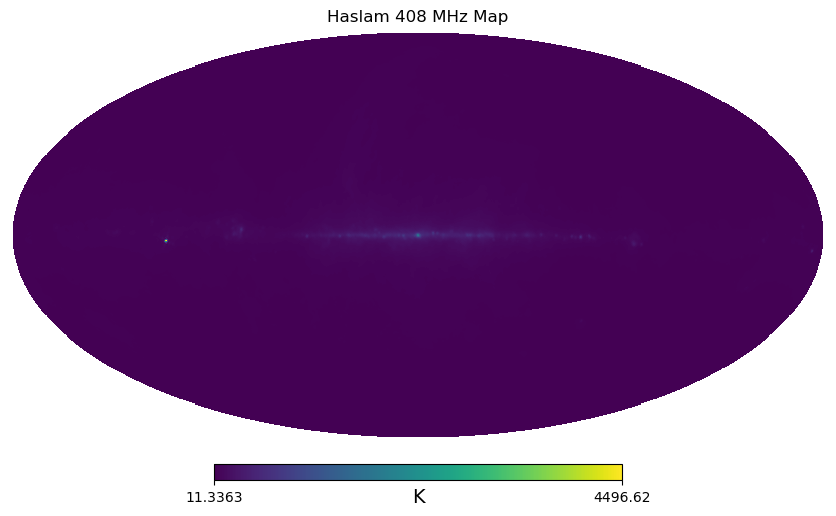

In [2]:
# Load the HEALPix map
haslam_map = hp.read_map('haslam408_dsds_Remazeilles2014.fits')

# Plot the map
hp.mollview(haslam_map, title='Haslam 408 MHz Map', unit='K')
plt.show()

## Extrapolate to new frequency (e.g., 50 MHz)

### If you want synchrotron temperature at another frequency ν, use a power-law model:

\begin{equation}
T_{\text{sync}}(\nu) = T_{\text{Haslam}} \cdot \left( \frac{\nu}{408\,\text{MHz}} \right)^{\beta}
\end{equation}

β ≈ −2.7 is typical (synchrotron spectral index).

Adjust β for your region/model (e.g. -2.5 to -3.1).

LOFAR (Low-Frequency Array) operates in the low radio frequency range and is designed to observe radio waves from space that are largely inaccessible from traditional observatories. Its frequency range is:

Low Band Antennas (LBA): ~10 MHz to 90 MHz

High Band Antennas (HBA): ~110 MHz to 240 MHz

Taking the central frequency of LOFAR LBA $= 50\,\text{MHz}$  
which corresponds to redshift $z \sim 27$ for the 21 cm signal.

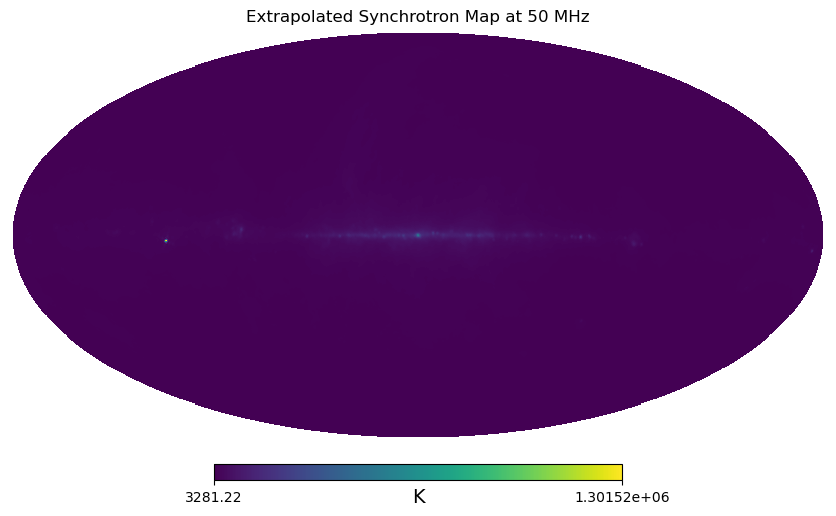

In [3]:
nu = 50  # MHz
beta = -2.7

T_sync = haslam_map * (nu / 408.0) ** beta

hp.mollview(T_sync, title="Extrapolated Synchrotron Map at 50 MHz", unit="K")
plt.show()

## Extract a Specific Patch from the Haslam Map

### Let’s say you want a patch centered at a Galactic coordinate (e.g., 𝑙 = 0∘, 𝑏 = 0∘) within a 10° radius.

In [4]:
nside = hp.get_nside(T_sync)

# Center in Galactic coordinates (degrees)
lon = 0     # Galactic longitude
lat = 0     # Galactic latitude
radius_deg = 10  # Radius in degrees

# Convert to theta, phi in radians for HEALPix (theta = colatitude)
theta = np.radians(90 - lat)
phi = np.radians(lon)
radius_rad = np.radians(radius_deg)

#Find pixel indices within that region
vec = hp.ang2vec(theta, phi)  # Convert to 3D vector
pix_indices = hp.query_disc(nside, vec, radius_rad)

patch_values = T_sync[pix_indices]

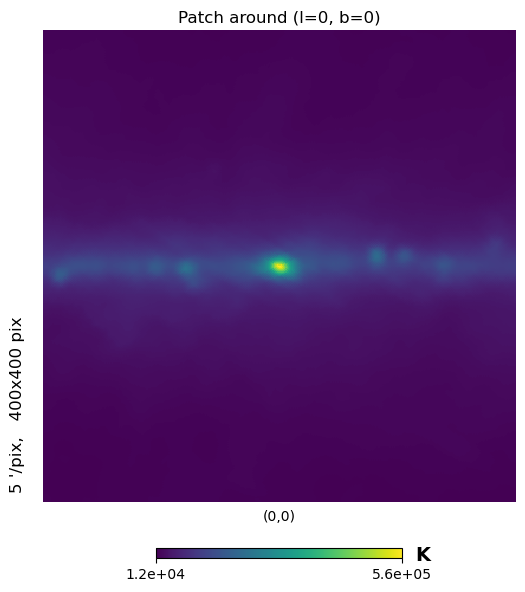

In [5]:
# Project it onto 2D image

hp.gnomview(T_sync, rot=[lon, lat], reso=5, xsize=400,
            title=f"Patch around (l={lon}, b={lat})", unit="K")

## Extract & Plot a Rectangular Region (Galactic Coordinates)

### Example: Region from 𝑙 = 30∘ to 60∘, 𝑏 = −10∘ to +10∘

In [6]:
l_min, l_max = 30, 60     # Galactic longitude range in degrees
b_min, b_max = -10, 10    # Galactic latitude range in degrees

# Make grid of lon/lat
lon = np.linspace(l_min, l_max, 500)
lat = np.linspace(b_min, b_max, 200)
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Convert to HEALPix angles (theta = 90 - lat)
theta = np.radians(90 - lat_grid)
phi = np.radians(lon_grid)

# Get pixel indices
pix_indices = hp.ang2pix(nside, theta, phi)

# Extract map values at those pixels
map_values = T_sync[pix_indices]
map_values = map_values.reshape(lat_grid.shape)

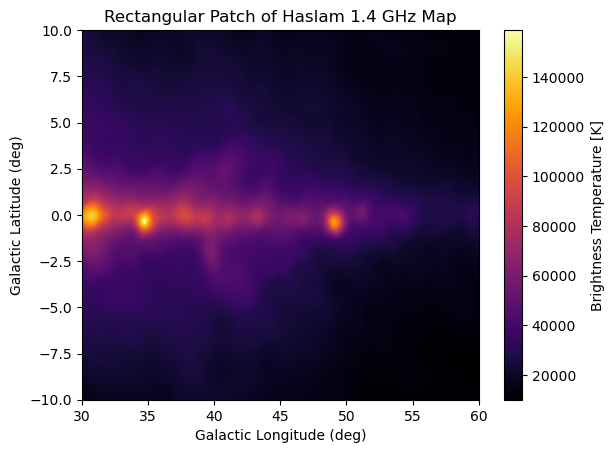

In [7]:
# Plot the rectangular patch

plt.imshow(map_values, origin="lower", extent=[l_min, l_max, b_min, b_max], aspect='auto', cmap='inferno')
plt.colorbar(label="Brightness Temperature [K]")
plt.xlabel("Galactic Longitude (deg)")
plt.ylabel("Galactic Latitude (deg)")
plt.title("Rectangular Patch of Haslam 1.4 GHz Map")
plt.show()